# **Predicting Health Insurance Price for an individual or family**

# **Businesses Problem**

In today’s dynamic healthcare environment, determining accurate health insurance costs is increasingly complex due to factors such as age, BMI, smoking habits, and region. Traditional pricing models often lead to inefficiencies, either overcharging customers or causing financial risk to insurers.

To address this, a regression model is employed, as the health insurance cost is a continuous variable. By leveraging machine learning techniques, the model predicts insurance charges based on historical data patterns—enhancing pricing accuracy, fairness, and operational efficiency.



##🎯 **Project Objective:**



To analyze historical health insurance data and build a robust machine learning model that can accurately predict the health insurance cost (charges) for future customers based on key factors such as age, gender, BMI, number of children, smoking status, and region.

## 💼 **Business Benefit:**


1.   Improved Pricing Accuracy: Accurately predic
charges based on risk factors to ensure fair and competitive premiums.

2.   Better Risk Assessment: Helps underwriters and actuaries identify high-risk individuals.

3.   Customer Retention: Competitive and fair pricing increases customer satisfaction and trust.

4.  Operational Efficiency: Automates risk-based pricing, reducing manual evaluations and time.

5.   Scalability: The model can be adapted for other types of insurance pricing (life, auto, etc.).

## **Dataset**:
The dataset used in this project consists of 1338 entries with 7 features:
* age
* gender
* bmi
* Childern
* smoking_status
* location
* health_insurance_price

## **Target Variable**: health_insurance_price
The target variable in this project is *health_insurance_price* , which represents the total medical costs billed by the insurer. Since charges is a continuous variable, a regression model is ideal for predicting this value based on


## **Features (Independent Variables):**

*  Demographics (age, gender)

*  Lifestyle choices (e.g., smoking, BMI)

*  Family structure (number of children/dependents)

*  Geographic location (regional healthcare cost variability)

## **Methodology**
*  **Data Exploration**: Understand the structure of the dataset, identify missing values, and analyze the distribution of each feature.

*  **Data Preparation**: Handle categorical variables, rename columns for clarity, and apply necessary transformations to numerical features.

*  **Model Training**: Develop and train multiple machine learning models using the prepared dataset.

*  **Model Performance** Evaluation: Assess the performance of the trained models using key metrics such as R-squared score and mean squared error to ensure predictive accu


# **Data Understanding**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("/content/4021579-Health_insurance_cost (1).csv")
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
    age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520  


In [ ]:
# Dataset shape
print("\nDataset Shape:")
print(df.shape)  # (Rows, Columns)


Dataset Shape:
(1338, 7)


In [ ]:
# Dataset info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None


In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               age          BMI     Children  health_insurance_price
count  1310.000000  1315.000000  1338.000000             1336.000000
mean     39.166412    30.638217     1.094918            13268.527719
std      14.055378     6.110302     1.205493            12112.797724
min      18.000000    15.960000     0.000000             1121.873900
25%      26.000000    26.210000     0.000000             4744.325050
50%      39.000000    30.305000     1.000000             9382.033000
75%      51.000000    34.580000     2.000000            16604.302645
max      64.000000    53.130000     5.000000            63770.428010


In [ ]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())


Number of Duplicate Rows:
1


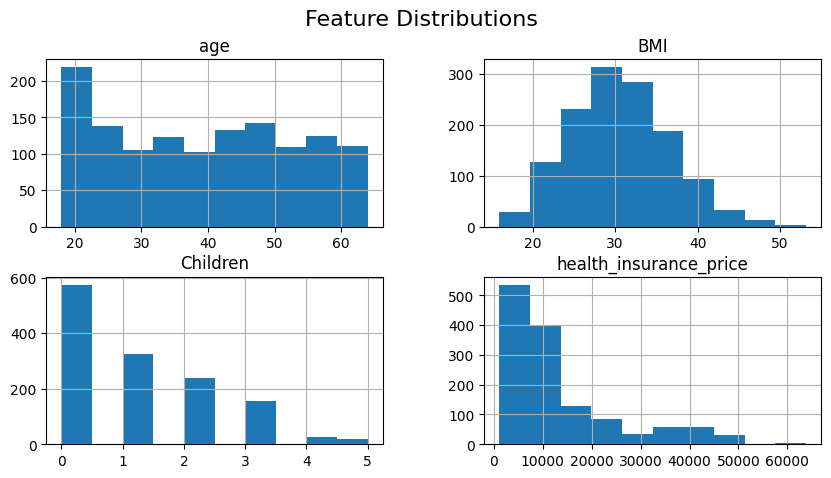

In [ ]:
# Histogram for numerical columns
df.hist(figsize=(10, 5), bins=10)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

<ipython-input-9-de06d02cd7bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
<ipython-input-9-de06d02cd7bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
<ipython-input-9-de06d02cd7bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


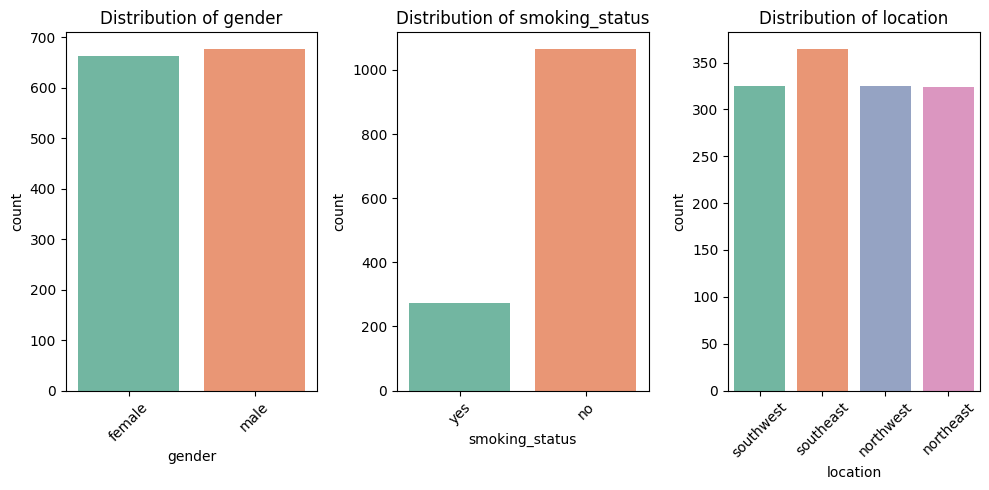

In [ ]:
# Countplot for categorical variables
categorical_features = ["gender", "smoking_status","location"]
plt.figure(figsize=(10, 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-10-e6f401636a0d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
<ipython-input-10-e6f401636a0d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
<ipython-input-10-e6f401636a0d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
<ipython-input-10-e6f401636a0d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

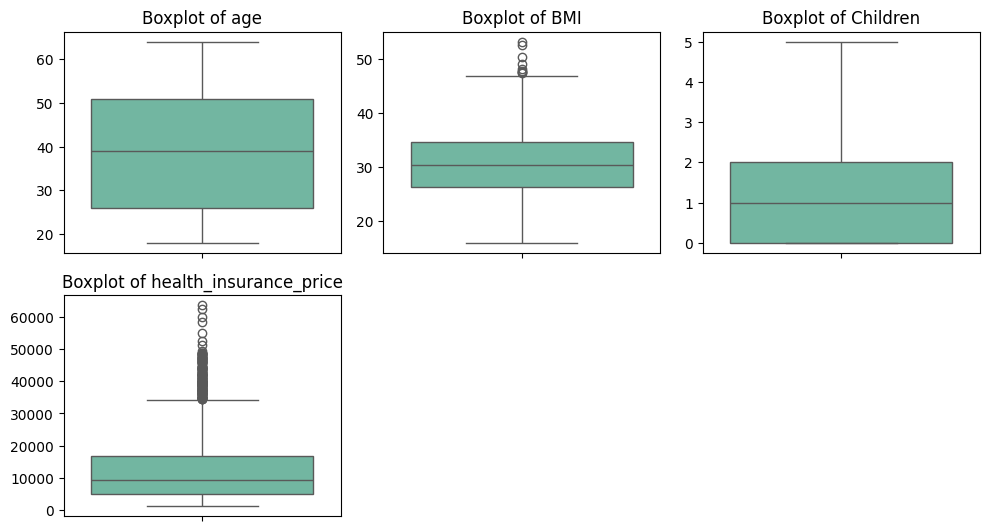

In [ ]:
# Boxplot for numerical features to check for outliers
numerical_features = ["age", "BMI", "Children", "health_insurance_price"]

plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.ylabel("")
plt.tight_layout()
plt.show()


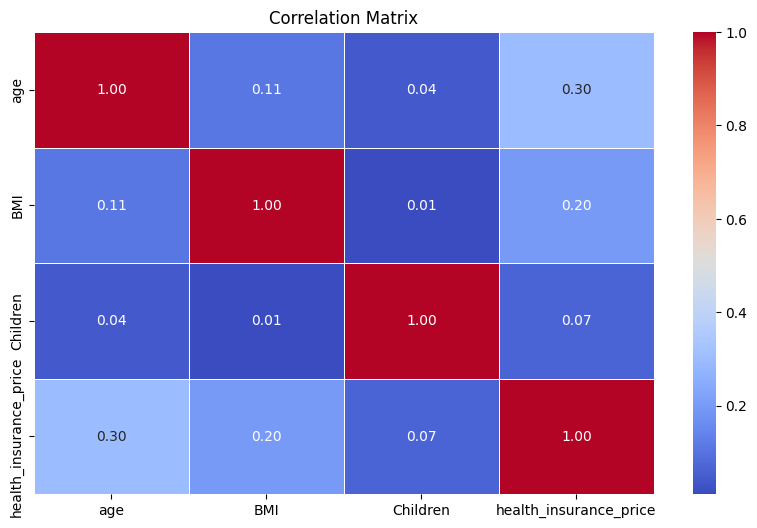

In [ ]:
# Correlation matrix (only for numerical features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **Data Preprocessing**

# **Handling Duplicates**

In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicate rows if any
df = df.drop_duplicates()

# Verify removal
print(f"New dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows: 1
New dataset shape after removing duplicates: (1337, 7)


# **Handling Missing Values**

In [ ]:
# Check missing values before imputation
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


In [ ]:
# Creating separate copies for different imputation techniques
df_mean = df.copy()
df_median = df.copy()
df_ffill = df.copy()
df_bfill = df.copy()

In [ ]:
# Mean Imputation (For numerical columns)
df_mean["age"] = df_mean["age"].fillna(df_mean["age"].mean())
df_mean["BMI"] = df_mean["BMI"].fillna(df_mean["BMI"].mean())
df_mean["health_insurance_price"] = df_mean["health_insurance_price"].fillna(df_mean["health_insurance_price"].mean())
# Display missing values
print("\nMissing values after Mean Imputation:")
print(df_mean.isnull().sum())


Missing values after Mean Imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


In [ ]:
# Forward Fill (ffill) - Uses previous value to fill missing values
df_ffill = df_ffill.fillna(method="ffill")
print("\nMissing values after Forward Fill (ffill):")
print(df_ffill.isnull().sum())


Missing values after Forward Fill (ffill):
age                       0
gender                    0
BMI                       1
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


<ipython-input-32-5a53a654bcaf>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_ffill.fillna(method="ffill")


In [ ]:
# Backward Fill (bfill) - Uses next value to fill missing values
df_bfill = df_bfill.fillna(method="bfill")
print("\nMissing values after Backward Fill (bfill):")
print(df_bfill.isnull().sum())


Missing values after Backward Fill (bfill):
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


<ipython-input-33-e8cfd78d79ef>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df_bfill.fillna(method="bfill")


 # **Handling Outliers**

In [ ]:
from scipy.stats import zscore

# Detecting Outliers using Z-Score
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers_z = (z_scores > 3).sum()
print("Outliers detected using Z-Score:\n", outliers_z)

Outliers detected using Z-Score:
 18


In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR:\n", outliers_iqr)


Outliers detected using IQR:
 age                         0
BMI                         9
Children                    0
health_insurance_price    141
dtype: int64


## **Removing Outliers using IQR (Interquartile Range)**

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Consider only numerical columns

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# Filter out outliers
df_cleaned = df[~outliers_mask.any(axis=1)]

print("Original Data Shape:", df.shape)
print("After IQR Outlier Removal:", df_cleaned.shape)

Original Data Shape: (1337, 7)
After IQR Outlier Removal: (1190, 7)


## **Removing Outliers using Z-Score**

In [ ]:
from scipy.stats import zscore
import numpy as np

# Compute Z-Scores for numerical columns
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))

# Keep only data points where Z-score is within ±3
df_z = df[(z_scores < 3).all(axis=1)]

print("Original Data Shape:", df.shape)
print("After Z-Score Outlier Removal:", df_z.shape)

Original Data Shape: (1337, 7)
After Z-Score Outlier Removal: (0, 7)


## **Winsorization (Capping Outliers)**

In [ ]:
from scipy.stats.mstats import winsorize

df_winsor = df.copy()

# Apply Winsorization to numerical columns (capping extreme values at 5% and 95%)
for col in df.select_dtypes(include=['number']).columns:
    df_winsor[col] = winsorize(df[col], limits=[0.05, 0.05])

print("Original Data Shape:", df.shape)
print("After Winsorization (Capping):", df_winsor.shape)

Original Data Shape: (1337, 7)
After Winsorization (Capping): (1337, 7)


In [ ]:
df_processed = df.copy()
# Step 2: Apply Winsorization to numeric columns
for col in df_processed.select_dtypes(include=['number']).columns:
    df_processed[col] = winsorize(df_processed[col], limits=[0.05, 0.05])

# **Feature scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Create separate copies of the dataset for each scaling method
df_minmax = df.copy()
df_standard = df.copy()
df_robust = df.copy()

In [ ]:
# Selecting only numerical columns for scaling
num_cols = df.select_dtypes(include=['number']).columns
# Min-Max Scaling (0 to 1 Range)
minmax_scaler = MinMaxScaler()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])
# Standard Scaling (Mean = 0, Std = 1)
standard_scaler = StandardScaler()
df_standard[num_cols] = standard_scaler.fit_transform(df_standard[num_cols])
#Robust Scaling (Uses Median & IQR - Good for Outliers)
robust_scaler = RobustScaler()
df_robust[num_cols] = robust_scaler.fit_transform(df_robust[num_cols])


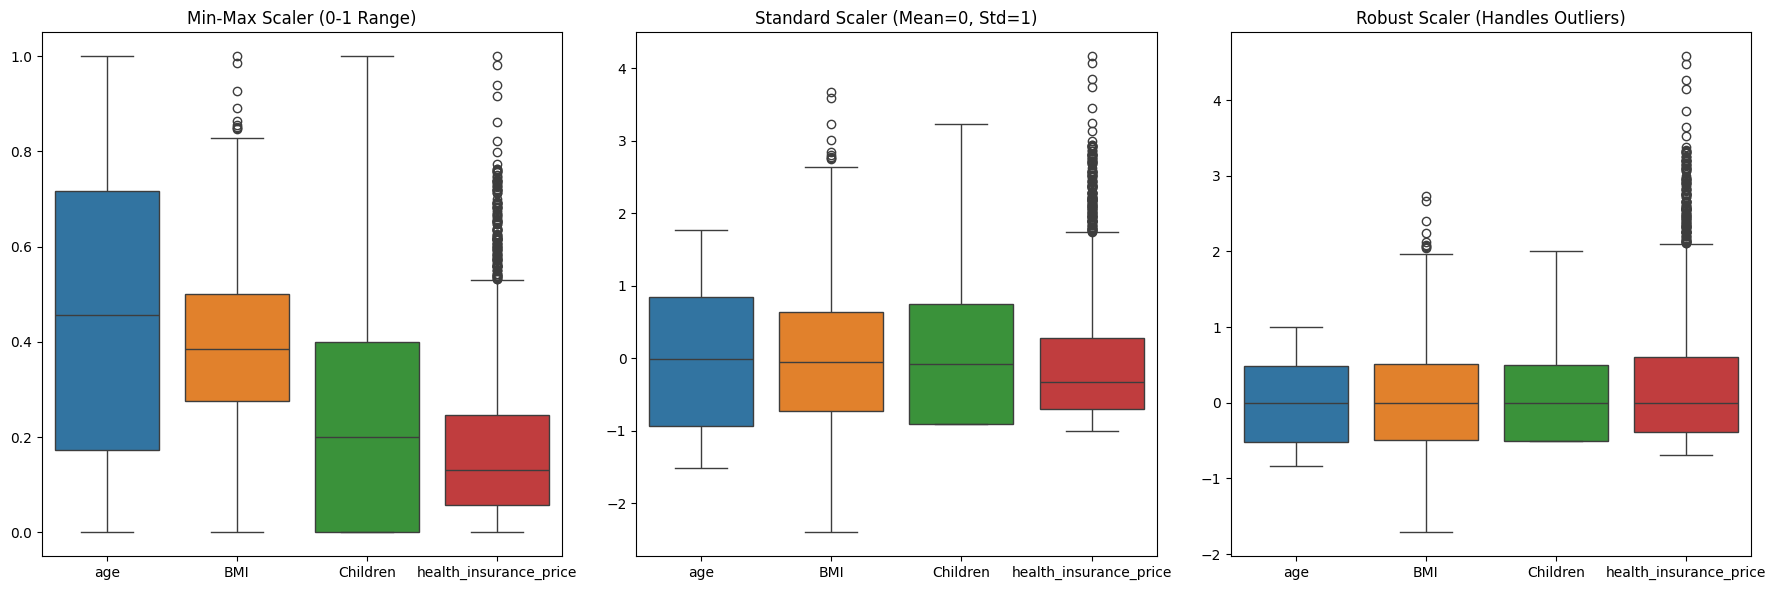

In [ ]:
# Visualizing the Differences
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Min-Max Scaler
sns.boxplot(data=df_minmax, ax=axes[0])
axes[0].set_title("Min-Max Scaler (0-1 Range)")

# Standard Scaler
sns.boxplot(data=df_standard, ax=axes[1])
axes[1].set_title("Standard Scaler (Mean=0, Std=1)")

# Robust Scaler
sns.boxplot(data=df_robust, ax=axes[2])
axes[2].set_title("Robust Scaler (Handles Outliers)")

plt.tight_layout()
plt.show()

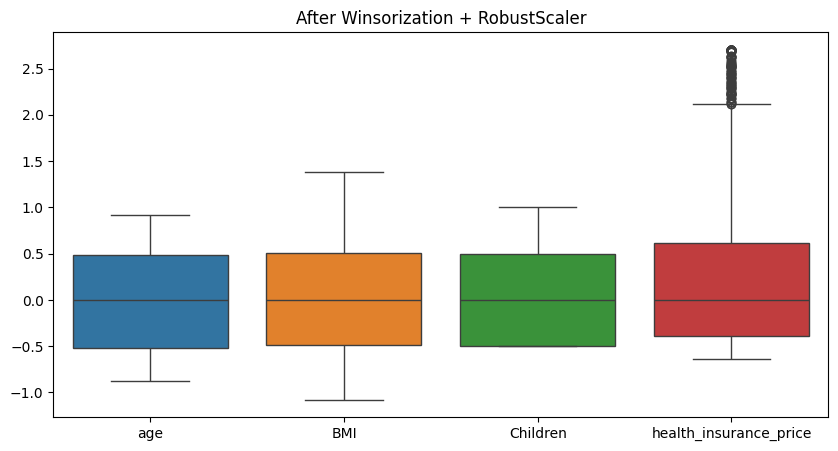

In [ ]:

# Apply RobustScaler (or any other)
scaler =  RobustScaler()
num_cols = df_processed.select_dtypes(include=['number']).columns
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])

#Plot boxplot to confirm
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_processed)
plt.title("After Winsorization + RobustScaler")
plt.show()


# **Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Selecting categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
# Label Encoding
df_label_encoded = df.copy()
label_encoder = LabelEncoder()
for col in cat_cols:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])
# Display results
print("Label Encoded Data:")
print(df_label_encoded.head())
print("\nUnique Values in Each Column:")
print(df_label_encoded.shape)

# One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("\nOne-Hot Encoded Data:")
print(df_one_hot_encoded.head())
print(df_one_hot_encoded.shape)

Label Encoded Data:
    age  gender     BMI  Children  smoking_status  location  \
0  19.0       0     NaN         0               1         3   
1  18.0       1  33.770         1               0         2   
2  28.0       1  33.000         3               0         2   
3  33.0       1  22.705         0               0         1   
4  32.0       1  28.880         0               0         1   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520  

Unique Values in Each Column:
(1337, 7)

One-Hot Encoded Data:
    age     BMI  Children  health_insurance_price  gender_male  \
0  19.0     NaN         0             16884.92400        False   
1  18.0  33.770         1              1725.55230         True   
2  28.0  33.000         3              4449.46200         True   
3  33.0  22.705         0             21984.47061         True   
4  32.0  28.880         0              

In [ ]:
# Check the updated data types and head of the dataframe
print(df_label_encoded.dtypes)
print(df_label_encoded.head())

age                       float64
gender                      int64
BMI                       float64
Children                    int64
smoking_status              int64
location                    int64
health_insurance_price    float64
dtype: object
    age  gender     BMI  Children  smoking_status  location  \
0  19.0       0     NaN         0               1         3   
1  18.0       1  33.770         1               0         2   
2  28.0       1  33.000         3               0         2   
3  33.0       1  22.705         0               0         1   
4  32.0       1  28.880         0               0         1   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520  


# **Data Splitting (Train-Test Split)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


# Define features (X) and target variable (y)
X = df_label_encoded.drop(columns=['health_insurance_price'])  # Features
y = df_label_encoded['health_insurance_price']  # Target variable

# Impute missing numerical columns with median
imputer = SimpleImputer(strategy='median')
numeric_cols = ['age', 'BMI', 'Children', 'health_insurance_price']
df_label_encoded[numeric_cols] = imputer.fit_transform(df_label_encoded[numeric_cols])

# Split features and target
X = df_label_encoded.drop('health_insurance_price', axis=1)
y = df_label_encoded['health_insurance_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
# Predictions
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"\n {name}:")
    print("   MSE :", mean_squared_error(y_test, y_pred))
    print("   MAE :", mean_absolute_error(y_test, y_pred))
    print("   RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("   R² Score (Accuracy):", r2_score(y_test, y_pred))

# Evaluate all models
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost Regressor", y_test, xgb_pred)


 Linear Regression:
   MSE : 36742011.46552365
   MAE : 4259.846688145134
   RMSE: 6061.518907462358
   R² Score (Accuracy): 0.8000500736818904

 Decision Tree:
   MSE : 41783549.95619136
   MAE : 3180.6458348097012
   RMSE: 6464.019643858716
   R² Score (Accuracy): 0.7726140349477341

 Random Forest:
   MSE : 22246607.571423452
   MAE : 2690.2914681432835
   RMSE: 4716.630955610525
   R² Score (Accuracy): 0.8789340221912474

 XGBoost Regressor:
   MSE : 19104486.19450293
   MAE : 2602.110422571478
   RMSE: 4370.867899456918
   R² Score (Accuracy): 0.8960334381659918


In [ ]:
import warnings
warnings.filterwarnings("ignore")
print("\n Enter details to predict health insurance cost:")

try:
    age = float(input("Age: "))
    gender = input("Gender (male/female): ").strip().lower()
    BMI = float(input("BMI: "))
    children = float(input("Number of children: "))
    smoking = input("Smoker? (yes/no): ").strip().lower()
    location = input("Region (northeast, northwest, southeast, southwest): ").strip().lower()

    # Encode user input using same encoding logic
    gender_enc = 1 if gender == 'male' else 0
    smoking_enc = 1 if smoking == 'yes' else 0
    location_map = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
    location_enc = location_map.get(location, -1)

    if location_enc == -1:
        raise ValueError("Invalid location entered.")

    # Form the input array
    user_input = [[age, gender_enc, BMI, children, smoking_enc, location_enc]]

    # Predict using Random Forest
    prediction1 = rf.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with Random Forest regression: ${prediction1:.2f}")
    prediction2=dt.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with Decision Tree: ${prediction2:.2f}")
    prediction3=lr.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with Linear regresssion: ${prediction3:.2f}")
    prediction4=xgb.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with XGBOOST regresssion: ${prediction4:.2f}")


except Exception as e:
    print("Error in input:", e)


 Enter details to predict health insurance cost:
Age: 18
Gender (male/female): male
BMI: 33.77
Number of children: 1
Smoker? (yes/no): no
Region (northeast, northwest, southeast, southwest): southeast

Predicted Health Insurance Cost with Random Forest regression: $2594.88

Predicted Health Insurance Cost with Decision Tree: $1725.55

Predicted Health Insurance Cost with Linear regresssion: $4076.82

Predicted Health Insurance Cost with XGBOOST regresssion: $3641.35


# **Model Evaluation Report**


## **Models Used**
1. Linear Regression

2. Decision Tree Regressor

3. Random Forest Regressor

4. XGBOOST


## **Models Evaluated and Result:**




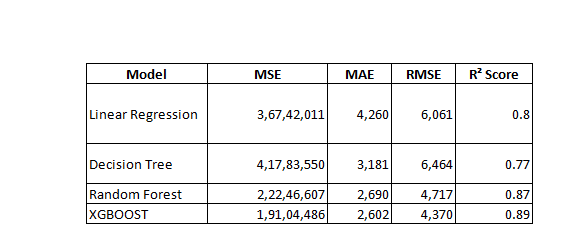


#    **Best Performing Model: XGBOOST Regressor**
Even though the Decision Tree predicted the exact value once, it has higher overall error rates (MSE, RMSE) and tends to overfit.And it having high R2 and lowest RSME


Random Forest is the most reliable and generalizable model across different test cases.

**Why XGBOOST:**

* It reduces overfitting by averaging many decision trees.

* Captures nonlinear relationships between features and cost.

* Handles categorical and continuous data well.

* More robust to outliers and variance in the data.


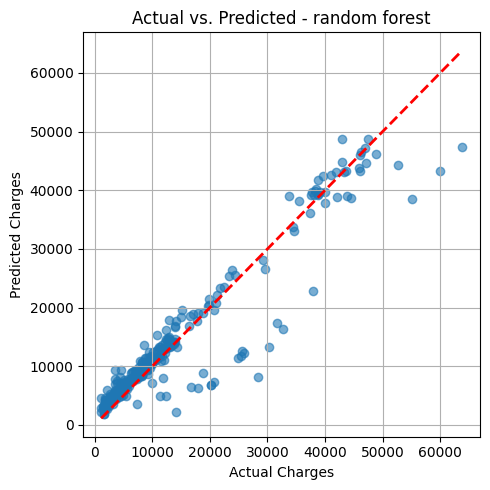

In [ ]:

# Scatter plot: Actual vs. Predicted values for Random Forest
plt.figure(figsize=(5, 5))
plt.scatter(y_test, xgb_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted - random forest')
plt.grid(True)
plt.tight_layout()
plt.show()



# **Final Conclusion:**
XGBOOST is the best choice due to its superior performance metrics, ability to generalize, and close alignment with actual values—even in unseen predictions.

## **Questions**

1. **Why is this proposal important in today’s world? How predicting a health insurance cost
accurately can affect the health care/insurance field?**

 **Importance of Accurate Health Insurance Cost Prediction**:
Accurate prediction of health insurance costs helps insurers set fair premiums, manage risks effectively, and ensure financial stability. It also enables consumers to access affordable and transparent pricing.

2. **If any, what is the gap in the knowledge, or how your proposed method can be helpful if required
in the future for any other type of insurance?**

  **Gap in Knowledge and Future Applications:**
There is a gap in understanding how certain factors influence insurance costs. The proposed method can address this gap, offering more accurate predictions. This approach can also be applied to other insurance types (e.g., auto, home) to improve pricing and risk management.

3. **Please aim to identify patterns in the data and important features that may impact an ML mode?**
 **Identifying Patterns and Important Features:**
Key features influencing health insurance costs include age, BMI, number of children, and medical history. Identifying these patterns allows for better-targeted pricing and improved decision-making in the insurance industry

## Data Analysis Apporach

1. **Approach to Prove or Disprove Hypothesis:**

  I will apply machine learning models (e.g., Linear Regression, Decision Trees, Random Forest) to analyze the relationship between features and health insurance costs, evaluating model performance to test the hypothesis.

2. **Feature Engineering Techniques:**

  Encoding Categorical Variables (e.g., one-hot encoding).

  Scaling Numerical Features (e.g., standardizing age, BMI).

3. **Justification of Data Analysis Approach:**
    
    XGBOOST is the best model, achieving the lowest MSE, MAE, and RMSE, along with the highest R² score (0.896). This demonstrates its superior accuracy and ability to capture complex patterns in the data, making it the most effective approach for predicting health insurance costs


## Machine Learning Approach

1. **Method Used:**
   We used multiple regression-based machine learning algorithms to predict health insurance costs. The four models implemented are:

      *          Linear Regression

      *          Decision Tree Regressor

      *          Random Forest Regressor

      *           XGBoost Regressor

    These models were selected to compare simple, tree-based, and ensemble-based learning methods.


2. **Justification of the Best Model:**        

*   XGBoost Regressor is found to be the most appropriate model because:

   --It achieved the highest R² score (0.896), indicating better prediction accuracy.

  --It had the lowest error values (MSE: 19,104,486 | RMSE: 4,370.86 | MAE: 2,602.11), suggesting minimal deviation from actual values.

  --It is robust to overfitting due to built-in regularization.

  --It generalizes well across unseen data and performs consistently better than the other models.

3. **Steps Taken to Improve Model Accuracy:**

*    Handled missing values, duplicates, and outliers

*    Applied feature scaling and one-hot encoding

*    Selected key features using correlation and importance analysis

*     Evaluated models using R², MAE, RMSE, and MSE

4. **Model Comparison:**



  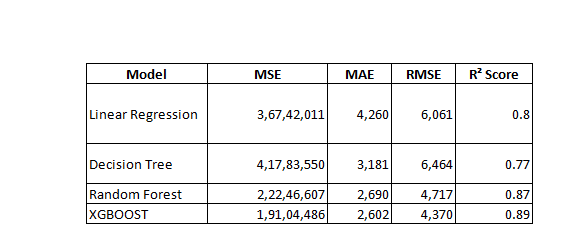
  
**XGBoost Regressor provides the best balance between accuracy and generalization, making it the most suitable model for predicting health insurance costs.**